In [ ]:
import pandas as pd

# Open the file in read mode
with open('random_paragraphs.txt', 'r') as file:
    # Read the entire random_paragraphs content
    random_paragraphs_content = file.readlines()

# Create a DataFrame from random_paragraphs.txt
df = pd.DataFrame(random_paragraphs_content, columns=['Content'])

# Print the DataFrame
df.tail()

,Content
31608,"Anderson, John Ward (20 June 2007). ""Dozens of..."
31609,After studying Law at the University of Hawaii...
31610,Sedenhorstia is an extinct genus of prehistori...
31611,Other Thai movies with the same title but not ...
31612,Garuda came down from his celestial residence ...


In [ ]:
df.columns

Index(['Content'], dtype='object')

In [ ]:
df.isnull().sum()

Content    0
dtype: int64

In [ ]:
!pip install spacy

In [ ]:
import spacy
# Load the english model
en = spacy.load('en_core_web_sm')
# remove stop words
df['content_clean'] = df['Content'].apply(lambda text: ' '.join([token.text for token in en(text) if not token.is_stop]))

df.head()

,Content,content_clean
0,This biographical article related to French ar...,biographical article related French artistic g...
1,InsideAR was the largest Augmented Reality eve...,InsideAR largest Augmented Reality event Europ...
2,The Fearing Mind is an American horror televis...,Fearing Mind American horror television series...
3,"Bill Fearing, a famous writer of suspense thri...","Bill Fearing , famous writer suspense thriller..."
4,It had a bronze barrel and lacked a modern rec...,"bronze barrel lacked modern recoil system , in..."


In [ ]:
df.drop(columns=['Content'], inplace=True)
df.tail()

,content_clean
31608,"Anderson , John Ward ( 20 June 2007 ) . "" Doze..."
31609,"studying Law University Hawaii , served legal ..."
31610,Sedenhorstia extinct genus prehistoric bony fi...
31611,Thai movies title based classical poem release...
31612,Garuda came celestial residence gamble ancient...


In [ ]:
# Count the frequency of each word in the processed text.
from collections import Counter

word_frequency = Counter()

# iterate each row
for text in df['content_clean']:
    word_frequency.update(text.split())

# convert to dataframe and sort it
word_frequency_df = pd.DataFrame(word_frequency.items(), columns=['words', 'frequency'])
word_frequency_df = word_frequency_df.sort_values(by='frequency', ascending=True)

word_frequency_df.shape


(87267, 2)

In [ ]:
word_frequency_df.head(7)

,words,frequency
43633,oceanographer,1
55581,eclipsed,1
55582,Apted,1
55585,Gere,1
55586,Basinger,1
55587,Cronenweth,1
55588,Tavoularis,1


<ipython-input-16-268582f9da66>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_frequency_df['words'][1010:1025], y=word_frequency_df['frequency'][1010:1025], palette=palette)


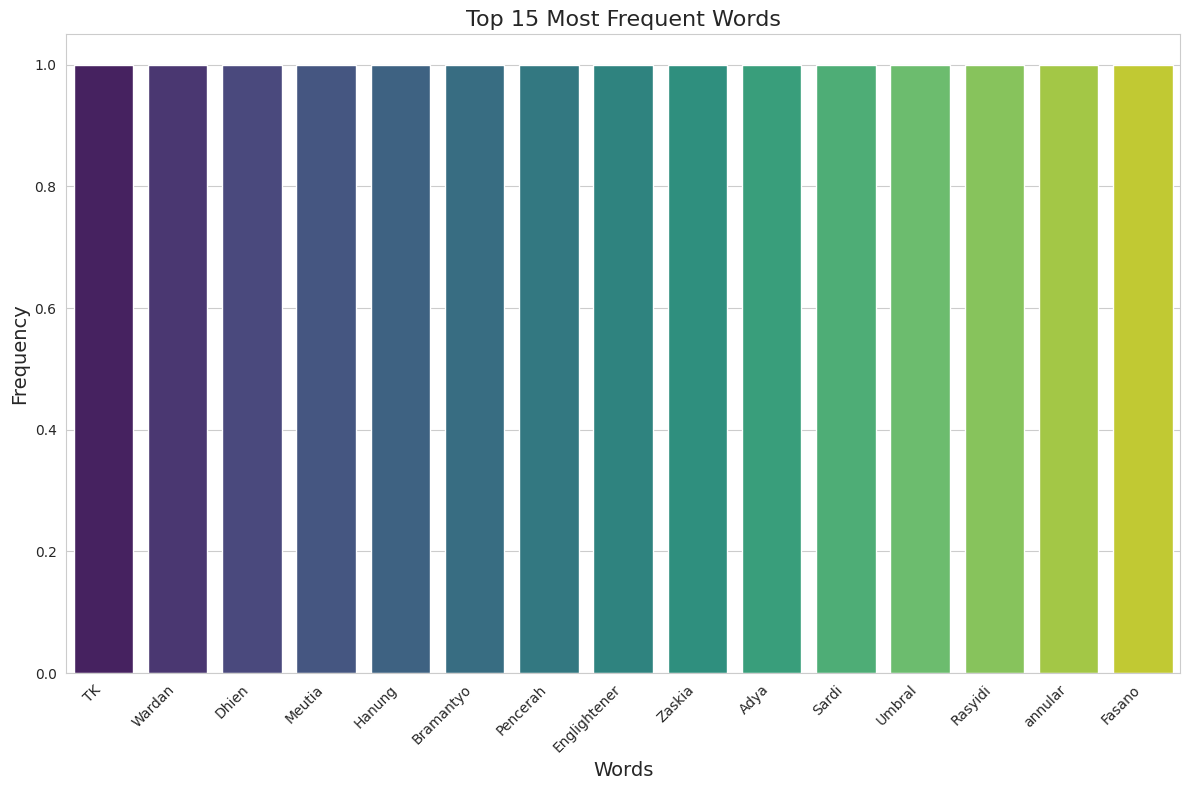

In [ ]:
# plot sample result
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
palette = sns.color_palette("viridis", len(word_frequency_df['words'][1010:1025]))

plt.figure(figsize=(12, 8))
sns.barplot(x=word_frequency_df['words'][1010:1025], y=word_frequency_df['frequency'][1010:1025], palette=palette)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 15 Most Frequent Words', fontsize=16)
plt.xticks(rotation=45, ha='right')
# prevent clipping of labels
plt.tight_layout()

plt.show()

In [ ]:
# Display the word frequency count to the console.
print("Word Frequency Count:")
for index, row in word_frequency_df.iterrows():
    print(f"Word: {row['words']}, Frequency: {row['frequency']}")

Streaming output truncated to the last 5000 lines.
Word: Guild, Frequency: 26
Word: Kiss, Frequency: 26
Word: Lost, Frequency: 26
Word: Bridges, Frequency: 26
Word: Cornwall, Frequency: 26
Word: Beginning, Frequency: 26
Word: friendship, Frequency: 26
Word: moderate, Frequency: 26
Word: Elliott, Frequency: 26
Word: 1893, Frequency: 26
Word: spotted, Frequency: 26
Word: Week, Frequency: 27
Word: quantum, Frequency: 27
Word: clothing, Frequency: 27
Word: grey, Frequency: 27
Word: assets, Frequency: 27
Word: peri, Frequency: 27
Word: shorter, Frequency: 27
Word: updated, Frequency: 27
Word: Bulgaria, Frequency: 27
Word: visits, Frequency: 27
Word: Northwest, Frequency: 27
Word: Sr, Frequency: 27
Word: J, Frequency: 27
Word: concepts, Frequency: 27
Word: Peru, Frequency: 27
Word: HMS, Frequency: 27
Word: indicates, Frequency: 27
Word: Tiny, Frequency: 27
Word: runners, Frequency: 27
Word: campaigns, Frequency: 27
Word: Pride, Frequency: 27
Word: Guy, Frequency: 27
Word: difficulties, Frequ